In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
# read the data, and display the head so to visualize if everything is ok
x_path = 'X.txt'
y_path = 'Y.txt'

x = pd.read_csv(x_path, sep=';')
y = pd.read_csv(y_path, sep=';')

x.head()

,Year,IsDayBin,Month,WindSpeed,IrrDirect,IrrDiffuse,Temperature,Percipitation,SnowFlow,SnowMass,AirDensity,RadSurface,RadTop,CloudCover
R1,2016,Night,1,5.777,0.0,0.0,-1.210,0.114,0.099,10.592,1.268,0.0,0.0,1.0
R2,2016,Night,1,5.887,0.0,0.0,-0.862,0.114,0.103,10.671,1.266,0.0,0.0,1.0
R3,2016,Night,1,5.957,0.0,0.0,-0.552,0.122,0.111,10.756,1.265,0.0,0.0,1.0
R4,2016,Night,1,6.025,0.0,0.0,-0.297,0.158,0.145,10.855,1.264,0.0,0.0,1.0
R5,2016,Night,1,6.101,0.0,0.0,-0.149,0.164,0.081,10.884,1.263,0.0,0.0,1.0


In [105]:
# display the y head so to visualize if everything is ok
y.head()

,WindPower,PVPower
R1,396.352,0.0
R2,417.778,0.0
R3,434.581,0.0
R4,448.482,0.0
R5,465.790,0.0


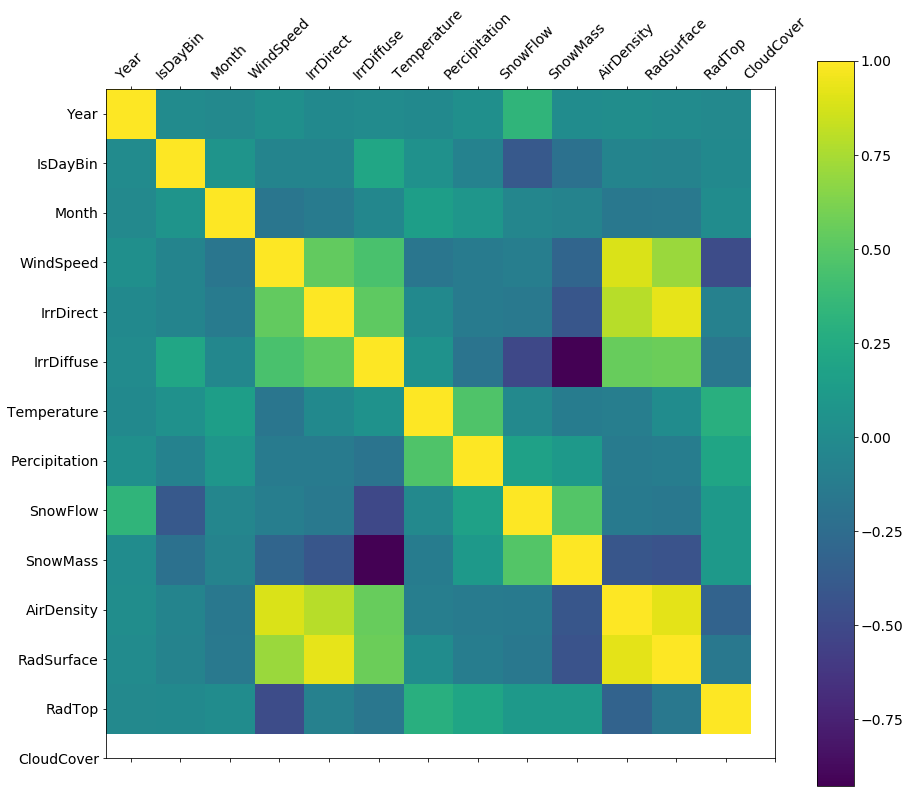

In [106]:
# plot the correlation matrix
f = plt.figure(figsize=(15, 13))
plt.matshow(x.corr(), fignum=f.number)
plt.xticks(range(x.shape[1]), x.columns, fontsize=14, rotation=45)
plt.yticks(range(x.shape[1]), x.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [107]:
# verify which categories are included in the categorical variables
x['IsDayBin'].unique()
# x['Year'].unique()
# x['Month'].unique()

array(['Night', 'Day'], dtype=object)

In [108]:
# drop the categorical X-variables
# --> check the questions on this
X = x.drop(['Year','IsDayBin','Month'],axis=1)
X.head()

,WindSpeed,IrrDirect,IrrDiffuse,Temperature,Percipitation,SnowFlow,SnowMass,AirDensity,RadSurface,RadTop,CloudCover
R1,5.777,0.0,0.0,-1.210,0.114,0.099,10.592,1.268,0.0,0.0,1.0
R2,5.887,0.0,0.0,-0.862,0.114,0.103,10.671,1.266,0.0,0.0,1.0
R3,5.957,0.0,0.0,-0.552,0.122,0.111,10.756,1.265,0.0,0.0,1.0
R4,6.025,0.0,0.0,-0.297,0.158,0.145,10.855,1.264,0.0,0.0,1.0
R5,6.101,0.0,0.0,-0.149,0.164,0.081,10.884,1.263,0.0,0.0,1.0


In [109]:
# drop a Y-variable
# --> check the questions on this
Y = y
#y.drop(['WindPower'],axis=1)

In [110]:
# Converting the dataframes to numpy arrays
X = X.values
Y = Y.values

In [111]:
# scaling the X-variables
# --> check the questions on this
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [112]:
# Splitting the dataset into training and test set
# --> check the questions on this
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.5,random_state=42)

In [113]:
# Using the SKLEARN library to fit a model
# --> check the questions on this
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)

# predict the data
y_predict = reg.predict(X_test)

# print the estimated coefficients
print(reg.coef_)

[[ 3.24787794e+02  6.18167360e+00  2.27321197e+00 -6.29791215e+00
   2.87975833e+00 -4.70188126e-01  1.42191444e+00 -8.17648579e+00
  -8.98538571e+00  9.69716267e+00 -2.02247631e+00]
 [ 4.51715705e-01  2.48703286e+02  9.13105643e+01 -6.17783901e+00
   9.94548811e-01 -1.12207863e+00  9.27782129e-02 -4.90684542e-01
  -3.74460972e+01 -1.40193153e+01  6.03757691e-01]]


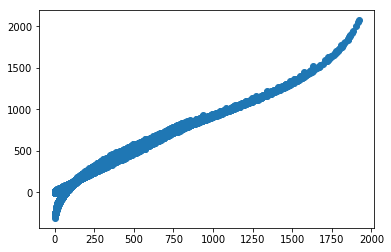

In [114]:
# Visualize how close the predicted data is to the measured one
# --> check the questions on this
plt.scatter(Y_test,y_predict)

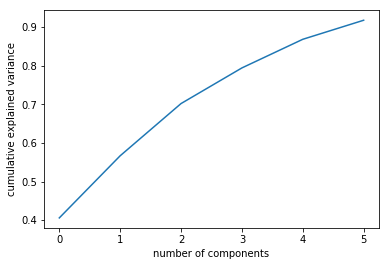

In [115]:
# Execute a PCA on the X space
# --> check the questions on this
from sklearn.decomposition import PCA
pca = PCA(6).fit(X_train)

# visualize the results
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [116]:
# compute P and T
P = pca.components_
T = X_train.dot(P.T)

('First component ', array([-0.07118599,  0.38158456,  0.39044395,  0.37715303, -0.04737328,
       -0.11409366, -0.18107559, -0.3204416 ,  0.43788638,  0.42866865,
       -0.16852541]))


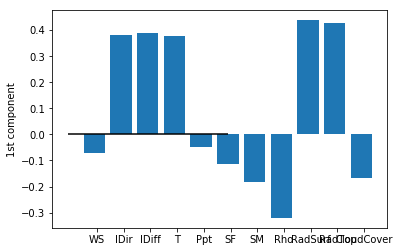

In [117]:
# plot the first component
# --> check the questions on this
print("First component ", P.T[:,0])
x = np.arange(X_scaled.shape[1])
plt.bar(x, height= P.T[:,0])
plt.hlines(0,-1,5)
plt.xticks(x+.1, ['WS','IDir','IDiff','T','Ppt','SF','SM','Rho','RadSurf','RadTop','CloudCover'])
plt.ylabel("1st component")
plt.show()

In [118]:
# verify that everything is as it should be
T.shape

(13152L, 6L)

[[ -19.40626015   98.23426495  -27.28759032  241.18050072 -187.48529663
   -14.47462816]
 [ 105.90366192  -60.82263039   40.20002892   44.5167236    24.12544413
   -20.43547046]]


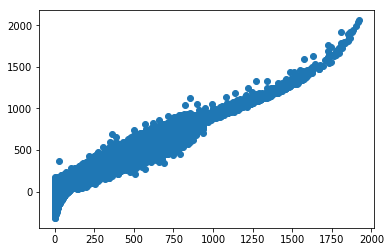

In [119]:
# train a PCR model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(T, Y_train)

# print the coefficients
print(reg.coef_)

# predict the y's and plot them against the measured y's
y_predict = reg.predict(X_test.dot(P.T))
plt.scatter(Y_test,y_predict)

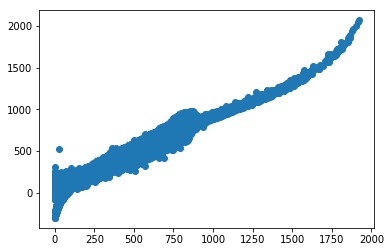

In [121]:
# train the PLS model
# --> check the questions on this
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=4)
pls2.fit(X_train, Y_train)

# predict the y's and plot them against the measured y's
y_predict = pls2.predict(X_test)
plt.scatter(Y_test,y_predict)

In [78]:
# for readability, save the variables so to have good names
T = pls2.x_scores_
U = pls2.y_scores_
W = pls2.x_weights_
C = pls2.y_weights_
P = pls2.x_loadings_
Q = pls2.y_loadings_

In [79]:
# for debug, just to see that the dimensions are the correct ones
print(T.shape,U.shape,W.shape,C.shape,P.shape,Q.shape)

((13152L, 4L), (13152L, 4L), (11L, 4L), (1L, 4L), (11L, 4L), (1L, 4L))


('First component ', array([ 0.78230455, -0.41591531, -0.34674397, -0.14367675,  0.29344595,
        0.21576039, -0.04445404,  0.00888408, -0.42237682, -0.38814749,
        0.14258583]))


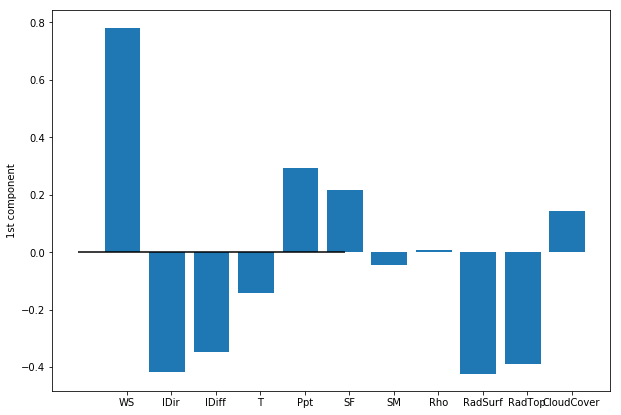

In [80]:
# plot the first component
print("First component ", P[:,0])
x = np.arange(X_scaled.shape[1])
plt.figure(figsize=(10,7))
plt.bar(x, height= P[:,0])
plt.hlines(0,-1,5)
plt.xticks(x+.1, ['WS','IDir','IDiff','T','Ppt','SF','SM','Rho','RadSurf','RadTop','CloudCover'])
plt.ylabel("1st component")
plt.show()

In [55]:
X_scaled.shape[1]

11L